# DSCI 100 Review Session 2 Worksheet

>## Author: Omer Tahir

### Loading relevant packages for notebook

In [3]:
## If working on syzygy then uncomment this code and run (It will take about 2 minutes to execute this cell)
# remove.packages("cli")
# install.packages("cli")
# install.packages("tidymodels")

In [5]:
## Otherwise I highly recommend using DSCI100 jupyterlab (access it through canvas) since packages are already up to date.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

## Chapter 5: Collaboration with version control

### 5.0 What is version control?
___

In order to version control a project, you generally need two things: 
 1) Version Control system
 2) Repository Hosting service

**Version Control:** 
* The version control system is the software that is responsible for tracking changes, sharing changes you make with others, obtaining changes others have made, and resolving conflicting edits. 
* E.g. Git, Mercurial, Subversion

**Repository Hosting Service:** 
* Responsible for storing a copy of the version controlled project online (a repository), where you and your collaborators can access it remotely, discuss issues and bugs, and distribute your final product. 
* E.g. GitHub, GitLab, BitBucket

### 5.1 GitHub repository hosting service
___

**Cloning a repository:**
* defined as copying/downloading the entire contents (files, project history, and location of the remote repository) of a remote GitHub.com repository to a computer (e.g., your workspace on a JupyterHub, or your laptop).

**Git has a distinct step of ADDING files to the STAGING AREA because:**
* Not all changes we make (i.e., files we create or edit) are ones that we want to push to our remote GitHub repository.
* It allows us to edit multiple files at once, but associate particular commit messages with particular files (so that the commit messages can more specifically reflect the changes that were made).

**Commit:**
* commit messages are required, and what is in the message is important! The most useful messages describe what the change to the file(s) was about so that you can easily and effectively review the project's history!
* When we commit our changes to Git, the snapshot of changes, the commit message, the time and date stamp and the user who committed the changes are all saved to the Git history on the LOCAL computer.

**Pushing:**
* Pushing with Git is the act of sending changes that were committed to Git to a remote repository, for example, on GitHub.com.
* You should push your work to GitHub anytime you want to share your work with others, or when you are done a work session and want to back up your work.

**Pulling:**
* Pulling with Git is the act of collecting changes that exists in a remote repository, for example, on GitHub.com, that do not yet exist on the local computer you are working on (i.e., your workspace on the JupyterHub or your laptop).

### 5.2 Advantages of Version Control
___

1) Version control tracks changes to the files in the analysis (code, writing, data, etc) over the lifespan of the project, including when the changes were made and who made them. This provides the means both to view earlier versions of the project and to revert changes.  
2) Version control also facilitates collaboration via tools to share edits with others and resolve conflicting edits. Even if you’re working on a project alone it helps you keep track of what you’ve done, when you did it, and what you’re planning to do next.  
3) Version control tools usually include a remote/cloud repository hosting service that can act as a backup of your local files (i.e., the files on your computer).  

### 5.3 Your workflow on JupyterHub should look like this
___

1) You edit, create, and delete files in your cloned repository on JupyterHub.  
2) Once you want a record of the current version, you specify which files to “add” to Git’s staging area. You can think of files in the staging area as those modified files for which you want a snapshot.  
3) You commit those flagged files to your repository, and include a helpful commit message to tell your collaborators about the changes you made. Note: here you are only committing to your cloned repository stored on JupyterHub. The repository on GitHub has not changed, and your collaborators cannot see your work yet.  
4) Go back to step 1. and keep working!  
5) When you want to store your commits (that only exist in your cloned repository right now) on the cloud where they can be shared with your collaborators, you push them back to the hosted repository on GitHub.  

### 5.4 GitHub Issues
___

* GitHub issues are an alternative written communication medium to email and messaging apps, and were designed specifically to facilitate project-specific communication.
* Issues are opened from the “Issues” tab on the project’s GitHub page, and they persist there even after the conversation is over and the issue is closed (in contrast to email, issues are not usually deleted).
* One issue thread is usually created per topic, and they are easily searchable using GitHub’s search tools.
* All issues are accessible to all project collaborators, so no one is left out of the conversation.
* Finally, issues can be setup so that team members get email notifications when a new issue is created or a new post is made in an issue thread.

## Chapter 6: Classification I (Training and Predicting)

### 6.0 Important packages for chapter 6
___

* `forcats`
    * forcats PACKAGE enables us to easily manipulate factors in R.
    * factors are a special categorical type of variable in R that are often used for class label data.

* `tidymodels`
    * K-nearest neighbour algorithm is implemented in the parsnip PACKAGE included in the tidymodels package collection.
    * The tidymodels package collection also provides the workflow

* `parsnip`   
    * Part of the `tidyverse` metapackage. (if you load tidyverse you do not need to load this package)
    * The K-nearest neighbour algorithm is implemented in the "parsnip" package included in the tidymodels package collection, along with many other models.
    * The tidymodels collection provides tools to help make and use models, such as classifiers.

### 6.1 Classification and Training Sets
___

* Classification is predicting a categorical class (sometimes called a label) for an observation given its other quantitative variables (sometimes called features). 
* Generally, a classifier assigns an observation (e.g. a new patient) to a class (e.g. diseased or healthy) on the basis of how similar it is to other observations for which we know the class (e.g. previous patients with known diseases and symptoms).
* These observations with known classes that we use as a basis for prediction are called a training set.
* We call them a “training set” because we use these observations to train, or teach, our classifier so that we can use it to make predictions on new data that we have not seen previously.

> **Training Data/Set:** It is a collection of observations for which we know the true classes. It can be used to explore and build our classifier.

### 6.2 Common functions we may use in this chapter
___

* `glimpse(df)`
    * This function can make it easier to inspect the data when we have a lot of columns

* `factor(col_name, levels = c(..., ..., ...))`
    * is used to encode a vector as a factor; it allows you to specify the values, and whether they are ordered or not.
    * the first argument is the column you want to convert.
    * the second argument are the values/categories/levels that are ordered.

* `add_row(df, col_name_1 = ..., col_name_2 = ..., ..., col_name_n = ...)`
    * creates and adds a row/observation to the df
    * specify the name and respective values of each column of the df in argument.

* `as.factor()`
    * simply coerces an existing vector to a factor, if possible.

* `as_factor()`
    * converts the column/variable into a statistical categorical variable.

* `levels()`
    * Factors have what are called “levels”, which you can think of as categories
    * This function return the name of each category in that column.
    * levels() function requires a vector as its argument. (Note: you might have to use `pull()` when operating on a dataframe)

* `dist()`
    * finds the euclidean distance between the specified observations of the dataframe.
    * this is used with the `slice()` function to first obtain the rows and then the result is piped into `dist()`
    * If there are more than 2 rows, the result is a matrix showing the distance between each row. pipe the result into as.matrix() to get the matrix

### 6.3 K-Nearest Neighbours Algorithm
___

In order to classify a new observation using a K-nearest neighbour classifier, we have to:

1) Compute the distance between the new observation and each observation in the training set  
2) Sort the data table in ascending order according to the distances  
3) Choose the top K rows of the sorted table  
4) Classify the new observation based on a majority vote of the neighbour classes  

#### **<u>Example Code:</u>**

```
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>  #(1)
        	set_engine("kknn") |>                                            #(2)
        	set_mode("classification")                                       #(3)

knn_fit <- fit(knn_spec, target_variable ~ predictor_variables, df)          #(4)

new_obs <- tibble(Permimeter = 0, Concavity = 3.5)                           #(5)
predict(knn_fit, new_obs)                                                    #(6)
```

1) We create a model specification for K-nearest neighbours classification by calling the `nearest_neighbor()` function.  
   Here we specify that we want to use K=5 neighbours.  
   The `weight_func` argument controls how neighbours vote when classifying a new observation  
   By setting it to `"rectangular"`, it measures the straight-line distance.
   Each of the K nearest neighbours gets exactly 1 vote as described above.

2) The `set_engine()` trains the model with a particular computational engine which needs to be specified in its argument.  
   In this case, we specify the `"kknn"` engine

3) The `setmode()` specifies what type of problem this is in its argument  
   In this case, it's a `"classification"` problem.  

4) In order to fit the model on the breast cancer data, we need to pass the model specification as the 1st argument.  
   Specify the variables we need to use to make the prediction and what variable to use as the target in the 2nd argument.  
   (Note: if you want to use all the other variables/columns to predict, then type `target_variable ~ .` )  
   The data frame being used as the 3rd argument.  
   The fit object lists the function that trains the model as well as the “best” settings for the number of neighbours and weight function  

5) `new_obs <- tibble(x_col = ..., y_col = ...)` creates a new observation with the x and y values.

6) prediction is made on the new observation using the fitted model and the new observation.

#### 6.3.1 Common problems using K-NN Classification

1) **Varying scales of each variable**  
When using K-nearest neighbour classification, the scale of each variable matters since large scale variables can have a greater (unwanted) affects.

2) **Class Imbalance**  
Another potential issue in a data set for a classifier is class imbalance, i.e., when one label is much more common than another.  
If there are many more data points with one label overall, the algorithm is more likely to pick that label in general 


#### 6.3.2 Solution to these problems

1) **Scaling and Centering**  
When all variables in a data set have a mean (center) of 0 and a standard deviation (scale) of 1, we say that the data have been standardized.  
As a rule of thumb, standardizing your data should be a part of the preprocessing you do before any predictive modelling / analysis.

2) **Balancing**  
Rebalance the data by oversampling the rare class.  
We replicate rare observations multiple times in our data set to give them more voting power in the K-nearest neighbour algorithm.   

#### 6.3.3 Data Preprocessing

> **Note:** 
>* Scaling & Centering and Balancing are part of preprocessing the data
>* In the `tidymodels` framework, data preprocessing is done by using a Recipe.
>* `prep()` and `bake()` are used in conjunction with `recipe()` to preprocess data (e.g. centering and scaling data). 

**Explanation of the `prep()`, `bake()` workflow:**
- `prep()` calculates the standard deviations and means required to scale and center the data. If you run the recipe before `prep()`, it just mentions the pre-processing steps it has to take.
- `bake()` applies the results of `prep()` on to the data. 
- You might be wondering, "why are these two separate functions, then?". Well, you might want to calculate the standard deviations and means for one data set and use those numbers to scale a DIFFERENT data set.
- For example, you might want to find the standard deviations for the training data set and use that to scale the testing data set. 
- This is because training our model or even standardizing our data based on the test data jeopardizes the validity of the test data and violates the golden rule of machine learning: never use any part of the test data to help make your model.

#### 6.3.4 Scaling and Centering

* When all variables in a data set have a mean (center) of 0 and a standard deviation (scale) of 1, we say that the data have been standardized.
* As a rule of thumb, standardizing your data should be a part of the preprocessing you do before any predictive modelling / analysis.

##### **<u>Example Code:</u>**

```
udf_recipe <- recipe(target_col ~ ., df) |>    #(1)
  step_scale(all_predictors()) |>              #(2)
  step_center(all_predictors()) |>             #(3)
  prep()                                       #(4)

scaled_df <- bake(recipe, df)                  #(5)
```

1) `recipe()` creates a Recipe for Preprocessing Data. Here we specify the target column/variable, and all other variables are predictors. (udf stands for unscaled dataframe)

2) `step_scale()` scales numeric data. `all_predictors()` applies it to all the predictor variables/columns.

3) `step_center()` centers numeric data.

4) `prep()` function finalizes the recipe by using the data to compute anything necessary to run the recipe (in this case, the column means and standard deviations).

5) `bake()` function applies the recipe to the dataframe?


#### 6.3.5 Balancing

* Rebalance the data by oversampling the rare class.
* We will replicate rare observations multiple times in our data set to give them more voting power in the K-nearest neighbour algorithm.
* In order to do this, we will add an oversampling step to the earlier `udf_recipe` recipe with the `step_upsample()` function.

##### **<u>Example Code:</u>**

```
ups_recipe <- recipe(target_col ~ ., data = df) |>          #(1)
  step_upsample(target_col, over_ratio = n, df) |>          #(2)
  prep()                                                    #(3)

upsampled_df <- bake(ups_recipe, df)
```

1) `recipe()` creates a Recipe for Preprocessing Data

2) `step_upsample()`
    * oversamples data points in minority to match those of majority.
    * 1st argument selects the `target_col`.
    * 2nd argument is a numeric value for the ratio of the majority-to-minority frequencies. (DEFAULT: over_ratio = 1)
    * 3rd argument takes in the dataframe.

3) `prep()` function finalizes the recipe by using the data to compute anything necessary to run the recipe

### 6.4 `workflow()`
___

>* We’re going to use this recipe in a `workflow()` so we don’t need to stress a lot about whether to `prep()` or not. 
>* If you want to explore what the recipe is doing to your data:
    * You can first `prep()` the recipe to estimate the parameters needed for each step
    * Then `bake(new_data = NULL)` to pull out the training data with those steps applied.

##### **<u>Example Code:</u>**
```
# load the unscaled cancer data and make sure the target Class variable is a factor
unscaled_cancer <- read_csv("data/unscaled_wdbc.csv") |> 
  mutate(Class = as_factor(Class))

# create the KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |> 
  set_engine("kknn") |>
  set_mode("classification")

# create the centering / scaling recipe
uc_recipe <- recipe(Class ~ Area + Smoothness, data = unscaled_cancer) |> 
  step_scale(all_predictors()) |> 
  step_center(all_predictors())

knn_fit <- workflow() |> 
  add_recipe(uc_recipe) |> 
  add_model(knn_spec) |> 
  fit(data = unscaled_cancer)

knn_fit

new_obs <- tibble(Perimeter = 0, Concavity = 3.5)
knnPred <- predict(knn_fit, new_obsv)
```

#### 6.4.1 Advantage of using `workflow()`

- This is a simple way to chain together multiple data analysis steps without a lot of otherwise necessary code for intermediate steps.
- We did not use the select function to extract the relevant variables from the data frame, and instead simply specified the relevant variables to use via the formula `Class ~ Area + Smoothness` (instead of `Class ~ .`) in the recipe.
- You will also notice that we did not call `prep()` on the recipe; this is unnecssary when it is placed in a workflow.
- We do not include a formula in the fit function. This is again because we included the formula in the recipe, so there is no need to respecify it.

## Chapter 7: Classification II (Evaluation and Tuning)

### 7.1 Common functions we may use in this chapter
___

* `bind_cols(col_object, df)`
    * binds the column/vector in argument 1 to dataframe in argument 2

* `rename(df, new_col_name = old_col_name)`
    * renames column name

>**Question**  
If we do not have access to the entire population, how do we evaluate our classifier with only the sample we are given?  
In other words, how do we EVALUATE our classifier without having to collect NEW observations from the actual source?

>**Answer**  
The trick is to SPLIT UP the data set into a TRAINING SET and TEST SET, and only show the classifier the TRAINING SET when building the classifier.  
Then to evaluate the accuracy of the classifier, we can use it to predict the labels (which we know) in the test set.  
If our predictions match the true labels for the observations in the TEST SET very well, then we have some confidence that our classifier might also do a good job of predicting the class labels for NEW observations that we do not have the class labels for.


### 7.2 Measures to assess the classifier
___

1) **Prediction Accuracy**:
$\frac{\text{total number of correct predictions}}{\text{total number of predictions}}$  
2) **Precision**  
3) **Recall**  

### 7.3 Steps to assess the classifier
___

##### **(1) <u>Create the TRAIN SET and TEST SET</u>**
- Training Set should be a 50-100% split of the data  
- Test Set should be the remaining 0-50% of data  
- You want to trade off between:
    - training an accurate model (by using a larger **training** data set)
    - getting an accurate evaluation of its performance (by using a larger **test** data set).

- `initial_split(df, prop = ..., strata = target_column)`
    - 2nd argument is the proportion you want for training (e.g. 0.75)
    - 3rd argument is the column name of the target variable.
    - use `set.seed()` for reproducible results as `initial_split()` randomly samples from df.
    - use `training(split_object)` & `testing(split_object)` to assign the training and test sets to respective reference objects.

##### **(2) <u>Pre-Process the data</u>**
- As we mentioned last chapter, K-NN is sensitive to the scale of the predictors, and so we should perform some preprocessing to standardize them.
- We should create the standardization preprocessor **using only the training data**.  
(This ensures that our test data does not influence any aspect of our model training)
- Once we have created the standardization preprocessor, we can then apply it **separately** to both the **training** and **test** datasets.

##### **(3) <u>Train the Classifier</u>**
- Create the K-nearest neighbour classifier with **only** the **training set**.  
(Here again you see the set.seed function. In the K-nearest neighbour algorithm, if there is a tie for the majority neighbour class, the winner is randomly selected.)

##### **(4) <u>Create the labels in the Test set</u>**
- Predict the class labels for our **test set** using the `predict()` function
- use the `bind_cols()` to add the column of predictions to the original test data creating the predictions dataframe.


##### **(5) <u>Compute the accuracy</u>**
- To assess classifier's accuracy, we use the `metrics()` function.
- `metrics(df, truth = target_col_name, estimate = .pred_class)`
    - 2nd argument takes the name of the the target variable/column
    - 3rd argument takes the name of the column with the predictions

- We can also look at the confusion matrix for the classifier, which shows the table of predicted labels and correct labels, using the `conf_mat()`.
- The *confusion matrix* for the classifier will show us the table of predicted labels and correct labels. 

A confusion matrix is essentially a classification matrix. The columns of the confusion matrix represent the actual class and the rows represent the predicted class (or vice versa). Shown below is an example of a confusion matrix.

|                  |          |  Actual Values |                |
|:----------------:|----------|:--------------:|:--------------:|
|                  |          |    Positive    |    Negative    |
|**Predicted Value**  | Positive |  True Positive | False Positive|
|                  | Negative | False Negative | True Negative  |


- A **true positive** is an outcome where the model correctly predicts the positive class.
- A **true negative** is an outcome where the model correctly predicts the negative class.
- A **false positive** is an outcome where the model incorrectly predicts the positive class.
- A **false negative** is an outcome where the model incorrectly predicts the negative class.

<br>

We can create a confusion matrix by using the `conf_mat` function. Similar to the `metrics` function, you will have to specify the `truth` and `estimate` arguments.

- `conf_mat(df, truth = Class, estimate = .pred_class)`
    - 2nd argument takes the name of the the target variable/column
    - 3rd argument takes the name of the column with the predictions

#### **Sample Code:**
```
##(1)##
set.seed(1)
cancer_split <- initial_split(cancer, prop = 0.75, strata = Class)
cancer_train <- training(cancer_split)
cancer_test <- testing(cancer_split)

##(2)##
cancer_recipe <- recipe(Class ~ Smoothness + Concavity, data = cancer_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

##(3)##
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_spec) |>
  fit(data = cancer_train)

knn_fit

##(4)##
cancer_test_predictions <- predict(knn_fit, cancer_test) |>
  bind_cols(cancer_test)
cancer_test_predictions

##(5)##
cancer_test_predictions |>
  metrics(truth = Class, estimate = .pred_class)

cancer_test_predictions |>
  conf_mat(truth = Class, estimate = .pred_class)
```

### 7.4 Tuning the model
___

- Predictive models in statistics and machine learning have parameters that you have to pick.
- For example, in the K-nearest neighbour classification algorithm we have had to pick the number of neighbours K for the class vote.
- Making the most optimal selection is called **Tuning** the model.

>**Question**  
How do we tune the model?

>**Answer**
>1) Split our **Training data** further into **two** subsets, called the **Training (sub)set** and **Validation set**.  
>2) Use the **Training (sub)set** for building the classifier, and the **Validation set** for evaluating it!  
>3) Then we will try different values of the parameter $K$ and pick the one that yields the highest accuracy.  

#### 7.4.1 Cross Validation Method

- Instead of randomly splitting the data, we want each observation in the data set to be used in a validation set only a single time.
- The name for this strategy is called cross-validation.
- In cross-validation, we split our overall **Training data** into $V$ evenly-sized chunks/folds
- Then iteratively use 1 chunk as the **Validation set** and combine the remaining $V−1$ chunks as the **Training (sub)set**.


$$\text{Cross-validation accuracy} = \frac{\sum{\text{accuracy of n folds}}}{\text{number of folds}}$$

#### 7.4.2 Use the following functions to perform $V$-fold Cross Validation

- `vfold_cv(training_dataframe, v = ..., strata = target_column)`
    - This function splits our training data into $V$-folds automatically
    - This is to be done after data has been split onto **Training** and **Test** sets.
    - Cross-validation uses a random process to select how to partition the training data therefore use `set.seed()`.

- `fit_resamples(..., resamples = df_vfold)`
    - it is used instead of `fit()` function when doing cross-validation **for only specified neighbours**.
    - This runs cross-validation on each train/validation split.
    - first argument is the `worklfow()` function which is piped in.

- `tune_grid(..., resamples = df_vfold, grid = n)`
    - it is used instead of `fit_resamples()` function when doing cross-validation for $n$ neighbours.
    - fits the model for each value in a range of parameter values
    - third argument specifies that the tuning should try at most $n$ values of the number of neighbours $K$ when tuning.
    - first argument is the `workflow()` which is piped in.
    - We set the seed prior to tuning to ensure results are reproducible

- `collect_metrics(...)`
    - Used instead of `metrics()` function when doing cross-validation.
    - Used to aggregate the mean and standard error of the classifier’s validation accuracy across the folds.
    - argument is the `workflow()`

- `tune()`
    - Each parameter in the model to be tuned should be specified as `tune()` in the model specification rather than given a particular value.

#### 7.4.3 Code required to perform $V$-fold cross validation

```
set.seed(1)

cancer_vfold <- vfold_cv(cancer_train, v = 10, strata = Class)

cancer_recipe <- recipe(Class ~ Smoothness + Concavity, data = cancer_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


# Specify the model for v-fold cross validation
# neighbors = tune() is used when we want to test the accuracies for a range of different parameter values.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

set.seed(1)
knn_results <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = cancer_vfold, grid = 10) |>
  collect_metrics()
knn_results

accuracies <- knn_results |>
  filter(.metric == "accuracy")

---------------------------------------------------------------------------------------------
Now check for most optimal accuracy (usually the highest and most stable one) by plotting them
---------------------------------------------------------------------------------------------

# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
```


#### 7.4.4 Notes about $V$-fold cross validation

- When you do cross-validation, you need to consider the size of the data, the speed of the algorithm (e.g., K-nearest neighbour) and the speed of your computer. 
- In practice, this is a trial and error process, but typically $V$ is chosen to be either 5 or 10.
- The more the folds, the lesser the standard error but the more expensive the computation.
- How good or not the prediction accuracy is depends entirely on the downstream application of the data analysis.

>**Question**  
How do you decide which parameter value is the "Best"?

>**Answer**  
Generally, when selecting $K$ (and other parameters for other predictive models), we are looking for a value where:
>1) we get roughly **optimal accuracy**, which means that changing the value to a nearby one (e.g. from K=7 to 6 or 8) does not decrease the accuracy too much therefore making our choice reliable in the presence of uncertainty
>2) the cost of training the model is not prohibitive (e.g., in our situation, if $K$ is too large, predicting becomes expensive!)

### 7.5 Underfitting and Overfitting
___

<u>**Under-fitting:**</u>  
As we increase the number of neighbours, more and more of the training observations (and those that are farther and farther away from the point)
get a “say” in what the class of a new observation is. This causes a sort of “averaging effect” to take place, making the boundary between where
our classifier would predict a tumour to be malignant versus benign to smooth out and become simpler.

In general, if the model isn’t influenced enough by the training data, it is said to underfit the data.


<u>**Over-fitting:**</u>  
In contrast, when we decrease the number of neighbours, each individual data point has a stronger and stronger vote regarding nearby points. 
Since the data themselves are noisy, this causes a more “jagged” boundary corresponding to a less simple model.
This is just as problematic as the large $K$ case, because the classifier becomes unreliable on new data:
if we had a different training set, the predictions would be completely different.

In general, if the model is influenced too much by the training data, it is said to overfit the data.

<center><img src="data_2/underover.JPG" width=500 height=400 /></center>

### 7.6 Shuffling and Stratification
___

<u>**Shuffling:**</u>  
When we split the data into train, test, and validation sets, we make the assumption that there is no order to our originally collected data set. However, if we think that there might be some order to the original data set, then we can randomly shuffle the data before splitting it. The tidymodels function `initial_split()` and `vfold_cv()` functions do this for us.


<u>**Stratification:**</u>  
If the data are imbalanced, we also need to be extra careful about splitting the data to ensure that enough of each class ends up in each of the train, validation, and test partitions. The strata argument in the `initial_split()` and `vfold_cv()` functions handles this for us too.

### 7.7 Advantages and Disadvantages of K-NN Classification
___

<u>**Advantages:**</u>  
* Simple and easy to understand
* No assumptions about what the data must look like
* Works easily for binary (two-class) and multi-class (> 2 classes) classification problems


<u>**Disadvantages:**</u>  
* As data gets bigger and bigger, K-nearest neighbour gets slower and slower, quite quickly
* Does not perform well with a large number of predictors
* Does not perform well when classes are imbalanced (when many more observations are in one of the classes compared to the others)

### 7.8 The overall workflow for performing K-nearest neighbour classification using tidymodels is as follows
___

0) First read the data into R and apply `as_factor()` on the column/variable you want to choose as your target variable.  
1) Use the `initial_split()` function to split the data into a **training** and **test** set. Set the strata argument to the target variable. Put the test set aside for now.  
2) Use the `vfold_cv()` function to split up the **training data** for cross validation.  
3) Create a **recipe** that specifies the **target** and **predictor variables**, as well as **preprocessing steps** for all variables. Pass the **training data** as the data argument of the **recipe**.  
4) Create a nearest_neighbors `model specification`, with `neighbors = tune()`.  
5) Add the `recipe` and `model specification` to a `workflow()`, and use the `tune_grid()` function on the train/validation splits to estimate the classifier accuracy for a range of $K$ values.  
> `tune_grid()` and `fit_resamples()` are used for **training** whereas `fit()` is used for **testing**.  
> `fit_resamples()` can only be used when you want to test the performance **using only one specified neighbour**  
> `tune_grid()` is a much better alternative as you can test the performance of different neighbours by performing cross validation for each neighbour.
6) Pick a value of $K$ that yields a high accuracy estimate that does not change much if you change $K$ to a nearby value. In the K-nearest neighbours classification algorithm, we choose the label/class for a new observation by taking the mode (value that appears most often, i.e., the majority vote) label/class of the K nearest neighbours.  
7) Make a new model specification for the best parameter value, and re-train the classifier using the `fit()` function.  
8) Evaluate the estimated accuracy of the classifier on the test set using the predict function.  

##### <u>**Example Code:**</u>
```
##(0)##
unscaled_cancer <- read_csv("data/unscaled_wdbc.csv") |> 
  mutate(Class = as_factor(Class))

##(1)##
set.seed(1)
cancer_split <- initial_split(cancer, prop = 0.75, strata = Class)
cancer_train <- training(cancer_split)
cancer_test <- testing(cancer_split)

##(2)##
set.seed(1)
cancer_vfold <- vfold_cv(cancer_train, v = 10, strata = Class)

##(3)##
cancer_recipe <- recipe(Class ~ Smoothness + Concavity, data = cancer_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

##(4)##
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

##(5)##
set.seed(1)
knn_results <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = cancer_vfold, grid = 10) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

##(6)##
# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

##(7)##
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

cancer_fit <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = cancer_train) |>
  collect_metrics()
  
##(8)##
# Get the prediction column
cancer_predictions <- predict(cancer_fit, cancer_test) |> 
    bind_cols(cancer_test)

# Compare the accuracy of predictions to the true values in the test set
cancer_acc <- cancer_predictions |> 
    metrics(truth = Classes, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# Compare the predictions to the true values in a confusion matrix
cancer_cm <- cancer_predictions |> 
    conf_mat(truth = Classes, estimate = .pred_class)

```


### 7.8 Review exercise for Chapter 7 (K-NN Classification)
___

**Question**  
* Perform K-NN classification on the `forest_fires_cleaned.csv`.
* Make training set contain 75% of the original dataset.
* Choose `Classes` as the target variable and `FFMC`, `ISI`, `Rain` as the predictor variables.
* Evaluate and tune the model
* Choose the best K value and obtain its metrics

In [74]:
# Read the data
forest_fires <- read.csv("data_2/forest_fires_cleaned.csv") |> 
    mutate(Classes = as_factor(Classes))

In [75]:
##(1)## 
set.seed(1234)


In [76]:
set.seed(1)

##(3)##


##(4)##


##(2)##


##(5)##


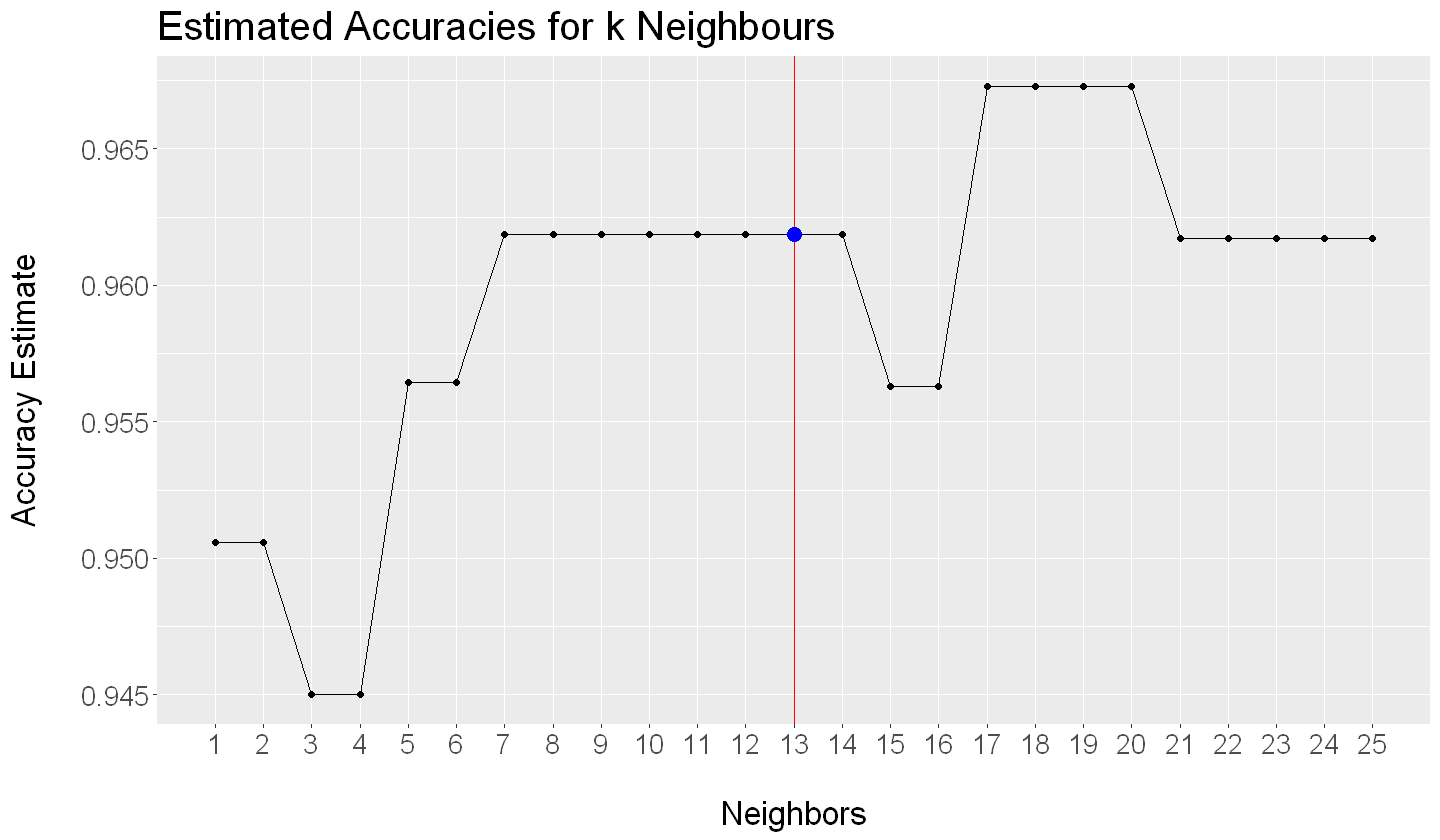

In [68]:
##(6)##

# This visualization suggests that K=13 provides the highest and the most omptimal accuracy.

In [72]:
##(7)##


##(8)##


.metric,.estimate
<chr>,<dbl>
accuracy,0.9677419


          Truth
Prediction not fire fire
  not fire       26    1
  fire            1   34

## Chapter 8: Regression I (K-NN Regression)

### 8.1 Introduction to K-NN regression
___

* Regression, like classification, is a predictive problem setting where we want to use past information to predict future observations.
* The goal is to predict numerical values instead of class labels.
* To predict a value of $Y$ for a new observation using k-nn regression, we identify the k-nearest neighbours and then assign it the mean of the k-nearest neighbours as the predicted value.


#### 8.1.1 Root Mean Squared Error (RMSE)

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. 

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{\left(\hat{y_i}-{y_i}\right)^2}}$$

<p><center>
  <img src = "https://miro.medium.com/max/611/1*jopCO2kMEI84s6fiGKdXqg.png" width = "500"/>
</center></p>

#### 8.1.2 RMSE vs RMSPE

* When predicting and evaluating prediction quality on the **training data**, we say $\text{RMSE}$.
* By contrast, when predicting and evaluating prediction quality on the **testing data** or **validation data**, we say $\text{RMSPE}$.
> $\text{RMSE}$ is a measure of goodness of fit.  
$\text{RMSE}$ measures how well the model predicts on data it was trained with.  
$\text{RMSPE}$ is a measure of prediction quality.  
$\text{RMSPE}$ measures how well the model predicts on data it was not trained with.  

### 8.2 Performing Regression with K-NN Algorithm
___

>* We will create a model specification for K-nearest neighbours regression, as well as a recipe for preprocessing our data.  
>* ***Note:*** We use `set_mode("regression")` which essentially tells tidymodels that we need to use different metrics i.e. $\text{RMSPE}$ (not accuracy) for tuning and evaluation.

##### <u>**Example Code:**</u>
```
marathon_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

marathon_recipe <- recipe(time_hrs ~ max, data = marathon_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

marathon_vfold <- vfold_cv(marathon_training, v = 5, strata = time_hrs)

gridvals <- tibble(neighbors = seq(1, 200))

marathon_results <- workflow() |> 
    add_recipe(marathon_recipe) |> 
    add_model(marathon_spec) |>
    tune_grid(resamples = marathon_vfold, grid = gridvals) |> 
    collect_metrics()

# show all the results
marathon_results

----------------------------------

# show only the row of minimum RMSPE
marathon_min <- marathon_results |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

marathon_min

----------------------------------

k_min <- marathon_min |>
         pull(neighbors)

marathon_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

marathon_best_fit <- workflow() |>
         add_recipe(marathon_recipe) |>
         add_model(marathon_best_spec) |>
         fit(data = marathon_training)

marathon_summary <- marathon_best_fit |>
          predict(marathon_testing) |>
          bind_cols(marathon_testing) |>
          metrics(truth = time_hrs, estimate = .pred)

marathon_summary

------------------------------------------------------------------------------------
[Plotting Regression line with K-NN Algorithm on training data]
------------------------------------------------------------------------------------

marathon_preds <- marathon_best_fit |>
  predict(marathon_training) |>
  bind_cols(marathon_training)

marathon_plot <- ggplot(marathon_preds, aes(x = max, y = time_hrs)) +
  geom_point(alpha = 0.4) +
  labs(x = "Maximum Distance Ran per \n Week During Training (mi)",
       y = "Race Time (hours)") +
  geom_line(data = marathon_preds, aes(x = max, y = .pred), color = "blue") +
  ggtitle(paste0("K = ", k_min)) +
  theme(text = element_text(size = 20))

marathon_plot

-----------------------------------

```

### 8.3 Strength and Limitations of K-NN Regression
___

<u>**Strengths:**</u>  
1) Simple and easy to understand  
2) No assumptions about what the data must look like  
3) Works well with non-linear relationships (i.e., if the relationship is not a straight line)  


<u>**Limitations:**</u>  
1) As data gets bigger and bigger, K-NN gets slower and slower, quite quickly 2. Does not perform well with a large number of predictors unless the size of the training set is exponentially larger.  
2) Does not predict well beyond the range of values input in your training data  

### 8.4 Overfitting vs Underfitting
___

<u>**Overfitting:**</u>  
Creates high variance and low bias.  
It has high variance because the flexible blue line follows the training observations very closely, 
and if we were to change any one of the training observation data points we would change the flexible blue line quite a lot. 
This means that the blue line matches the data we happen to have in this training data set, however, 
if we were to collect another training data set from the Sacramento real estate market it likely wouldn’t match those observations as well.


<u>**Underfitting:**</u>  
Creates low variance and high bias as the blue line is extremely smooth, and almost flat.  
This happens because our predicted values for a given x value (here home size), depend on many many (450) neighbouring observations.  
A model like this has low variance and high bias (intuitively, it provides very reliable, but generally very inaccurate predictions).  
It has low variance because the smooth, inflexible blue line does not follow the training observations very closely, and if we were to change any one of the training observation data points it really wouldn’t affect the shape of the smooth blue line at all.  
This means that although the blue line matches does not match the data we happen to have in this particular training data set perfectly, if we were to collect another training data set from the Sacramento real estate market it likely would match those observations equally as well as it matches those in this training data set.

<center><img src="data_2/underover.JPG" width=500 height=400 /></center>

### 8.5 Review Exercise for Chapter 8 (K-NN Regression)
___

Let's go through a full example of K-nn Regression. Below is another cancer dataset that we "borrowed" from a STAT301 assignment where:

* `TARGET_deathRate` is a continuous variable that measures cancer mortality rates.

* `povertyPercent` is a continuous variable that measures percentage of country's population in poverty.

In [22]:
cancer_data <- 
    read_csv("data_2/US_county_cancer_data.csv") |>
    select(TARGET_deathRate, povertyPercent)

head(cancer_data)

Rows: 3047 Columns: 34

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



TARGET_deathRate,povertyPercent
<dbl>,<dbl>
164.9,11.2
161.3,18.6
174.7,14.6
194.8,17.1
144.4,12.5
176.0,15.6


**Question**:  
Plot a regression line where `TARGET_deathRate` is the response/target variable $Y$, and `povertyPercent` is the predictor variable $X$.
* Split the training/testing data with a 70/30 ratio.
* Tune the model and find the minimum k value.
* For gridvals, use the nearest 200 neighbours

In [8]:
## Step 1: Split training and testing set


In [9]:
## Step 2: Create the model specification, model recipe, and use V-fold Cross-Validation and gridvals. 
##         Use the workflow function, and combined the four listed elements above, (add_recipe, add_model, tune_grid)
##         Collect the metrics


Warning message:
"package 'rlang' was built under R version 4.1.2"


In [27]:
cancer_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,38.53747581,5,0.599720459,Preprocessor1_Model001
1,rsq,standard,0.04547014,5,0.004509262,Preprocessor1_Model001
2,rmse,standard,33.95511992,5,0.475819352,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rsq,standard,0.1834156,5,0.02159623,Preprocessor1_Model199
200,rmse,standard,24.9041018,5,0.32219229,Preprocessor1_Model200
200,rsq,standard,0.1840039,5,0.02152428,Preprocessor1_Model200


In [28]:
## Step 3: Find the minimum k value


[1] 185

In [11]:
## Step 4: Use the minimum k value to create the best model specification and recipe.
##         Create a summary using the predict, bind_cols, and metrics functions


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,25.516832
rsq,standard,0.191743
mae,standard,18.937123


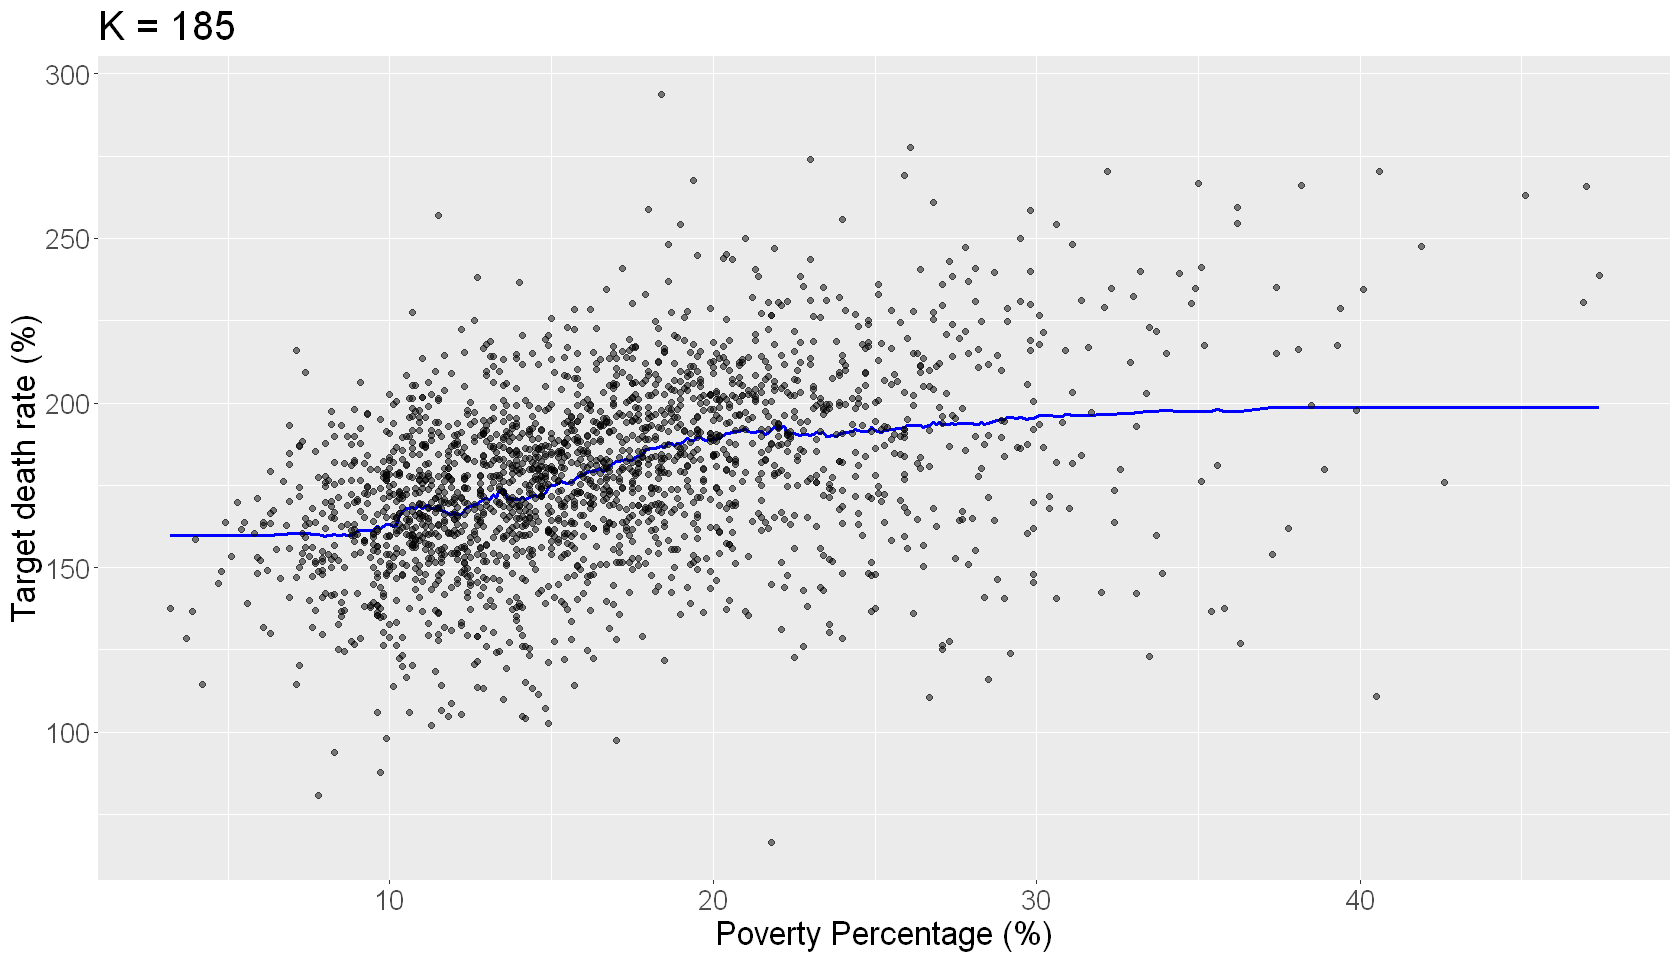

In [26]:
options(repr.plot.width = 14, repr.plot.height = 8)

## Step 5: Plot the regression line


## Chapter 9: Regression II (Linear Regression)

### 9.0 Important Packages for Chapter 9
___

* `tidymodels`
    * We can perform simple linear regression in R using tidymodels in a very similar manner to how we performed KNN regression.


### 9.1 Introduction to Linear Regression
___

- In KNN regression, we look at the K nearest neighbours and average over their values for a prediction. 
- In simple linear regression, we create a straight line of best fit through the training data and then “look up” the prediction using the line.
  Therefore using the data to find the line of best fit is equivalent to finding coefficients $\beta_{0}$ and $\beta_{1}$ that parametrize (correspond to) the line of best fit. 
- Simple linear regression chooses the straight line of best fit by choosing the line that minimizes the average squared vertical distance between itself and each of the observed data points in the training data.
- To assess the predictive accuracy of a simple linear regression model, we use $\text{RMSPE}$, the same measure of predictive performance we used with KNN regression.
- An additional difference that you will notice below is that we do not standardize (i.e., scale and center) our predictors.

### 9.2 Performing Multivaraite Linear Regression
___

##### <u>**Example Code:**</u>
```
set.seed(1234)
sacramento_split <- initial_split(sacramento, prop = 0.6, strata = price)
sacramento_training <- training(sacramento_split)
sacramento_testing <- testing(sacramento_split)


lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

mlm_recipe <- recipe(price ~ sqft + beds, data = sacramento_training)

mlm_fit <- workflow() |>
  add_recipe(mlm_recipe) |>
  add_model(lm_spec) |>
  fit(data = sacramento_training)
mlm_fit


lm_mult_test_results <- mlm_fit |>
  predict(sacramento_testing) |>
  bind_cols(sacramento_testing) |>
  metrics(truth = price, estimate = .pred)

lm_mult_test_results


# Take this step if you want the RMSPE value.
lm_rmspe <- lm_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()


------------------------------------------------------------------------------------
Visualizing the Simple Regression model
------------------------------------------------------------------------------------

- To visualize the simple linear regression model, we can plot the predicted house sale price across all possible house sizes we might encounter superimposed on a scatter plot of the original housing price data.
- There is a plotting function in the tidyverse, geom_smooth, that allows us to add a layer on our plot with the simple linear regression predicted line of best fit.


lm_plot_final <- ggplot(sacramento_training, aes(x = sqft, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
  geom_smooth(method = "lm", se = FALSE)
lm_plot_final
```

#### 9.2.1 Extracting Coefficients from Regression model

* We can extract the coefficients from our model by accessing the fit object that is output by the fit function.
* We first have to extract it from the workflow using the `pull_workflow_fit()` function.
* Then apply the tidy function to convert the result into a data frame:

##### <u>**Example Code:**</u>
```
coeffs <- lm_fit |>
             pull_workflow_fit() |>
             tidy()
coeffs
```

### 9.3 Comparison of Linear Regression vs KNN Regression
___

<u>**Advantages of Linear Regression over KNN-regression:**</u>  
1) KNN regression does **NOT** predict well beyond the range of the predictors in the training data. Linear regression can be used to address this problem.
2) In KNN regression, the method gets significantly slower as the training dataset grows. Linear regression can be used to address this problem.
3) In linear regression, standardization does not affect the fit (it does affect the coefficients in the equation, though!)
4) A straight line can be defined by two numbers, the vertical intercept and the slope. The intercept tells us what the prediction is when all of the predictors are equal to 0; and the slope tells us what unit increase in the target/response variable we predict given a unit increase in the predictor variable. KNN regression, as simple as it is to implement and understand, has no such interpretability from its wiggly line.

<u>**Disadvantages of Linear Regression when compared to KNN-regression:**</u>  
1) When the relationship between the target and the predictor is not linear, but instead some other shape (e.g. curved or oscillating).  In these cases the prediction model from a simple linear regression will underfit (have high bias), meaning that model/predicted values does not match the actual observed values very well. Such a model would probably have a quite high $\text{RMSE}$ when assessing model goodness of fit on the training data and a quite high $\text{RMSPE}$ when assessing model prediction quality on a test data set.

On such a data set, KNN regression may fare better.

### 9.4 Extrapolation
___

<u>**Extrapolation problems**</u>  
* Predicting outside the range of the observed data is known as extrapolation; KNN and linear models behave quite differently when extrapolating.  
* Depending on the application, the flat or constant slope trend may make more sense.  
* For example, if our housing data were slightly different, the linear model may have actually predicted a negative price for a small houses (if the intercept $\beta_{0}$ was negative), which obviously does not match reality.  
* On the other hand, the trend of increasing house size corresponding to increasing house price probably continues for large houses, so the “flat” extrapolation of KNN likely does not match reality.

### 9.5 Tuning to find out which set of predictors best fit the model
___

* If we are trying out many different sets of predictors for multivariate linear and KNN regression, we must perform this comparison using cross-validation on only our training data.  
* But if we have already decided on a small number (e.g., 2 or 3) of tuned candidate models and we want to make a final comparison, we can do so by comparing the prediction error of the methods on the test data.

### 9.6 Problems of Linear Regression
___

1) **Outliers**  
The problem with outliers is that they can have too much influence on the line of best fit.

2) **Collinearity problem in Multivariate linear regression**  
If collinearity between predictors are very high, then the plane of best fit will have regression coefficients that are very sensitive to the exact values in the data.  
We can design new predictors (by centering them) to tackle this problem.


### 9.7 Designing New Predictors
___

* Instead of trying to predict the response y using a linear regression on x, we might have some scientific background about our problem to suggest that y should be a cubic function of x. So before performing regression, we might create a new predictor variable z using the mutate function:

* The process of transforming predictors (and potentially combining multiple predictors in the process) is known as **Feature Engineering**.
```
df <- df |>
        mutate(z = x^3)
```

# Goodluck with Quiz 2!